In [1]:
import scvelo as scv
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
top_dir = "/home/owenwhitley/projects/su2c_v2"
preproc_dir = os.path.join(top_dir, 'data/preprocessed/scRNA/velocyto_GBM_GSCs_split_by_sample_no_G800_L')
loom_file = os.path.join(preproc_dir, 'GSCs_subs.loom')

In [3]:
scv.logging.print_version()
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
# scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

Running scvelo 0.2.2 (python 3.8.5) on 2020-09-01 18:10.


In [4]:
adata = scv.read(loom_file, cache=True)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Phase' as categorical
... storing 'orig.ident' as categorical
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


In [5]:
adata.var_names_make_unique()

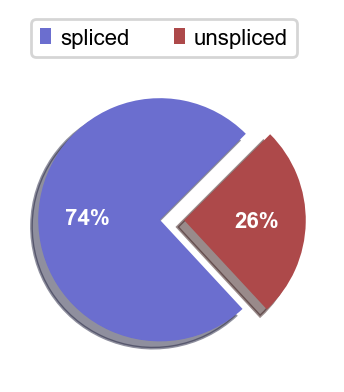

In [6]:
scv.pl.proportions(adata)

In [7]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 47918 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.


In [8]:
scv.tl.velocity(adata)

computing neighbors
    finished (0:00:11) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [9]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [10]:
DM_coords = adata.obs.loc[:, ['DM1', 'DM2']].to_numpy()

In [11]:
adata.obs.keys()

Index(['CC.Difference', 'DM1', 'DM2', 'Dev_IR_Diff', 'Dev_IR_Diff_zscore',
       'G2M.Score', 'Neftel_AC_AUC', 'Neftel_G1.S_AUC', 'Neftel_G2.M_AUC',
       'Neftel_MES1_AUC',
       ...
       'orig.ident', 'percent.mito', 'scBTSC_AUC', 'scGBM_AUC', 'unique_id',
       'initial_size_spliced', 'initial_size_unspliced', 'initial_size',
       'n_counts', 'velocity_self_transition'],
      dtype='object', length=133)

In [12]:
adata.obsm['dm'] = DM_coords

Renamed 'dm' to convention 'X_dm' (adata.obsm).
computing velocity embedding
    finished (0:00:03) --> added
    'velocity_dm', embedded velocity vectors (adata.obsm)


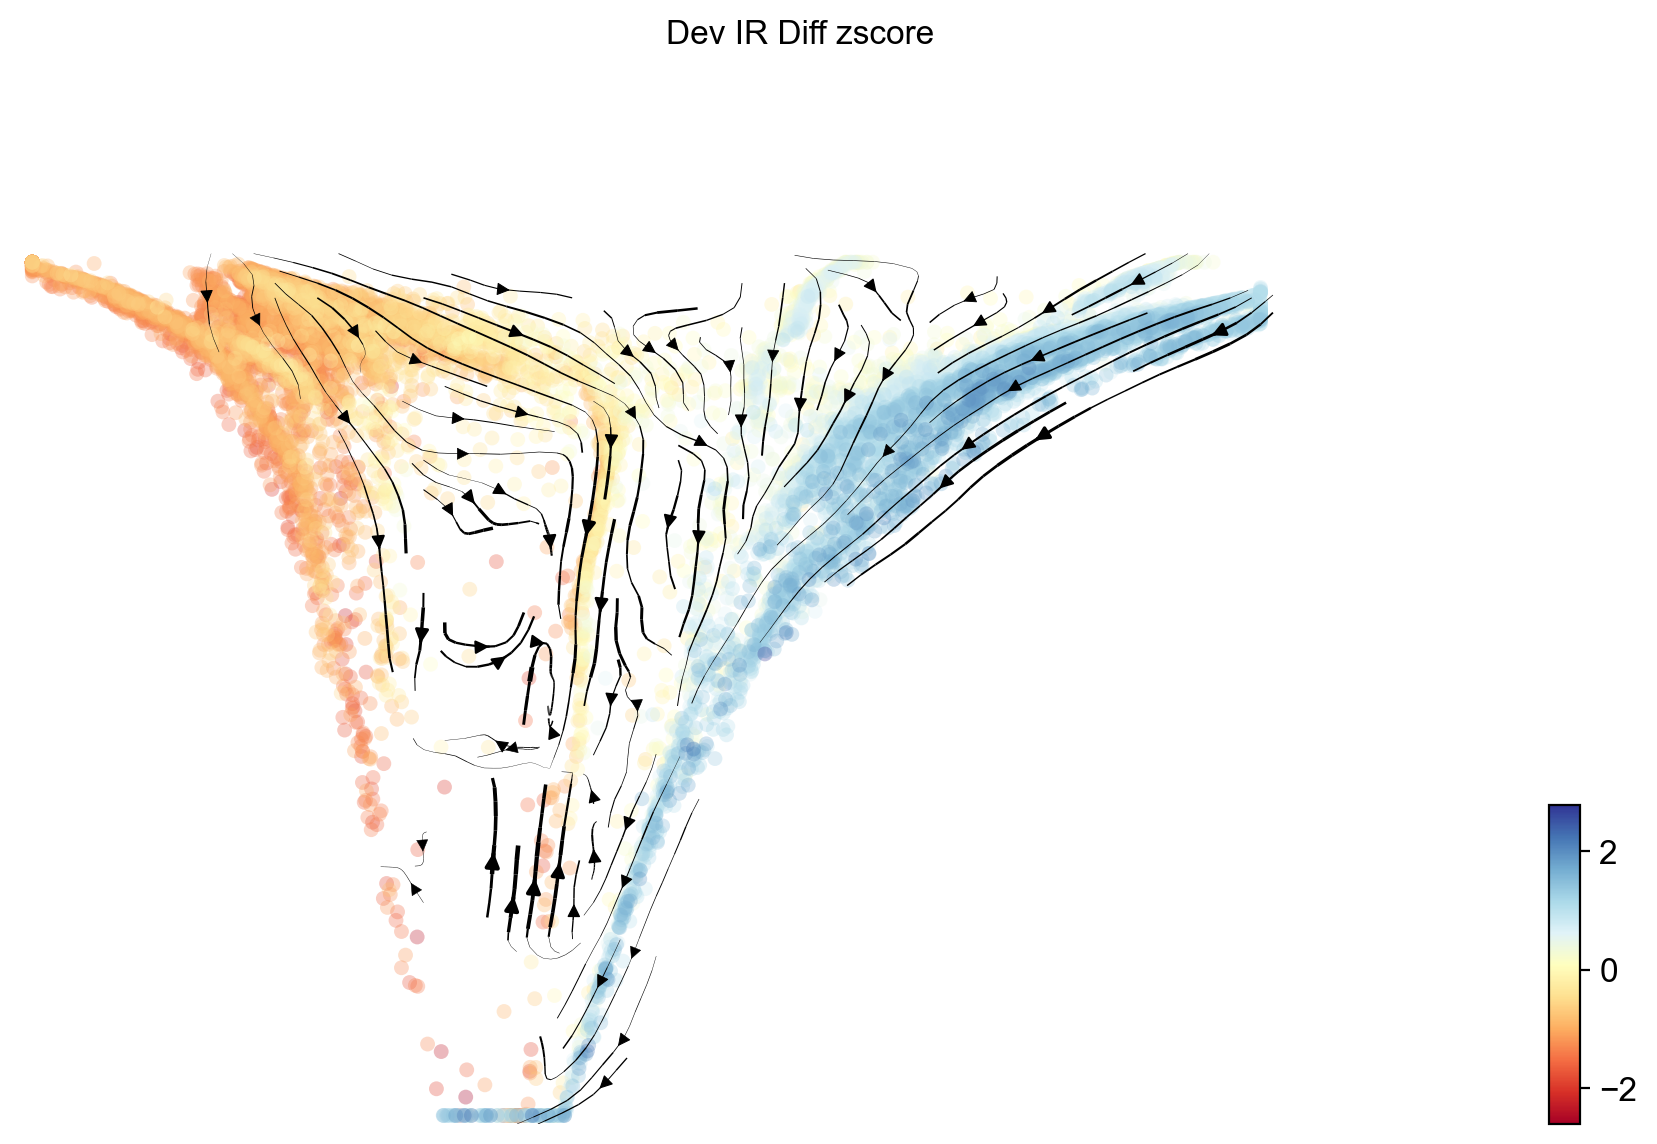

In [13]:
scv.pl.velocity_embedding_stream(adata, basis = 'dm', color = 'Dev_IR_Diff_zscore', figsize = (10, 7),
                                color_map = cm.RdYlBu)

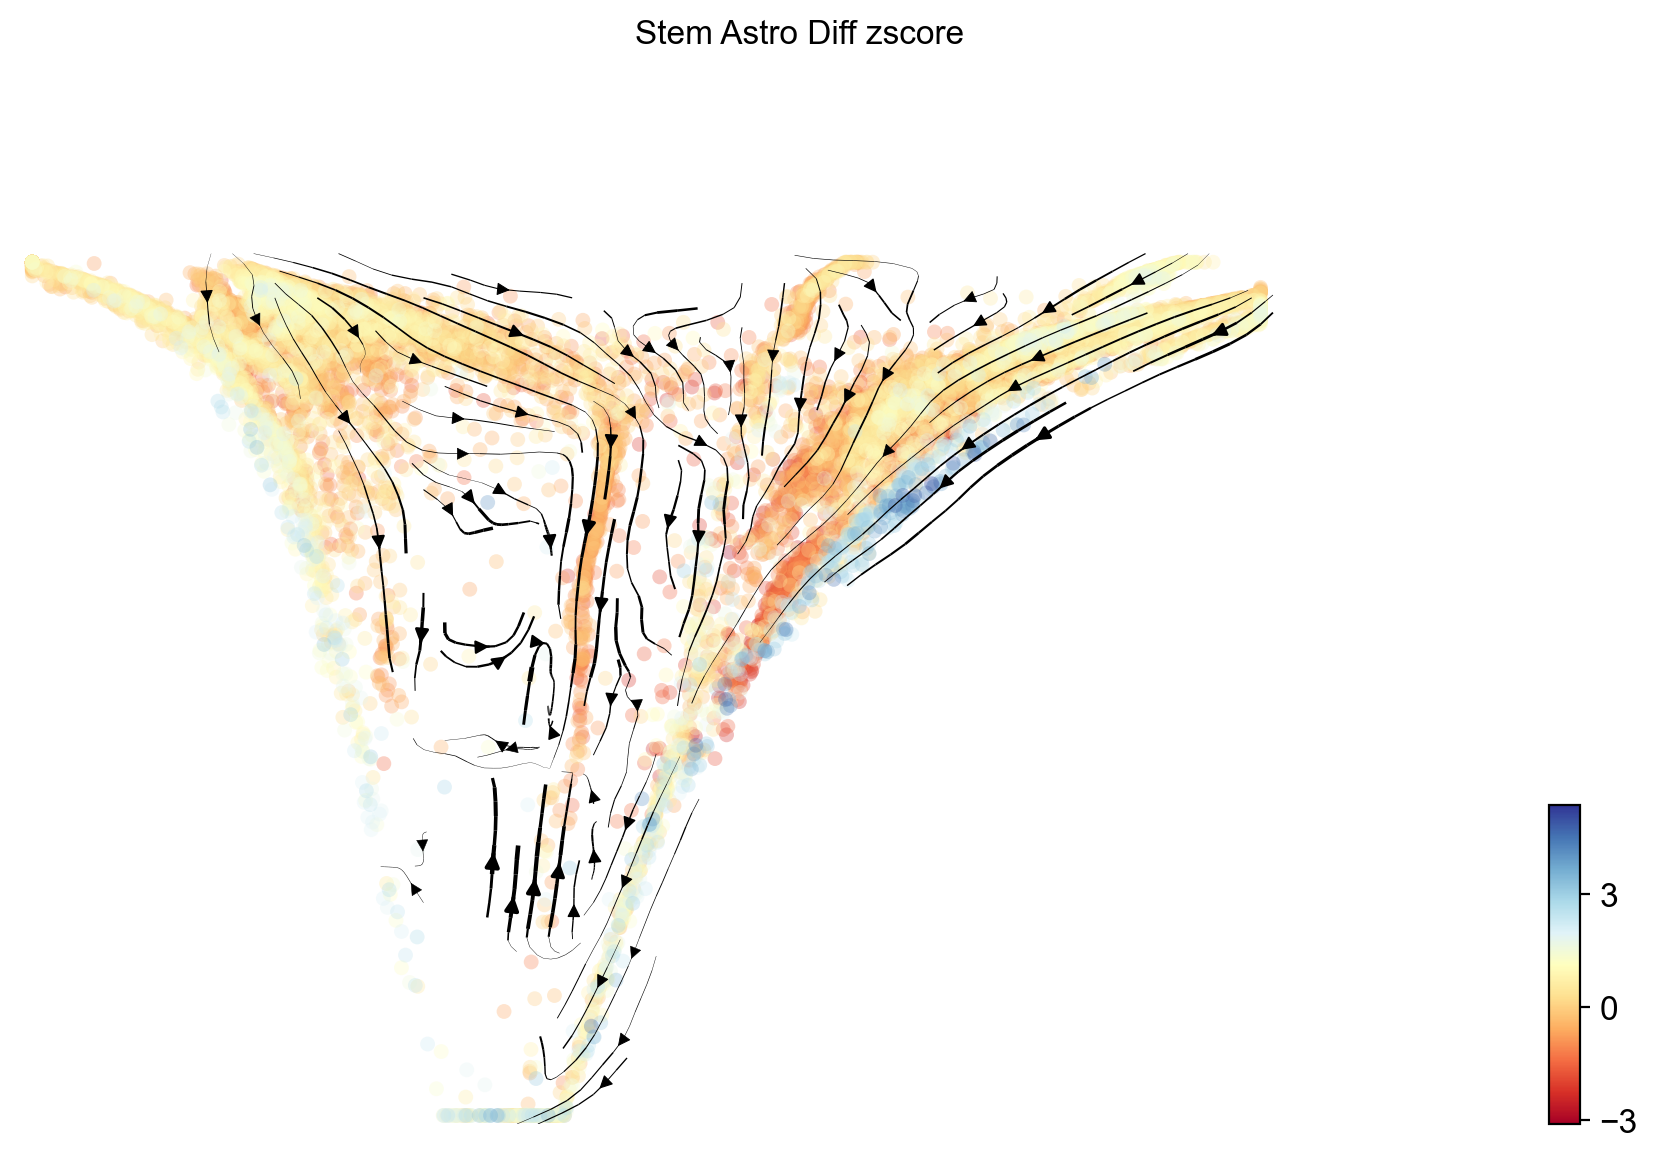

In [14]:
scv.pl.velocity_embedding_stream(adata, basis = 'dm', color = 'Stem_Astro_Diff_zscore', figsize = (10, 7),
                                color_map = cm.RdYlBu)

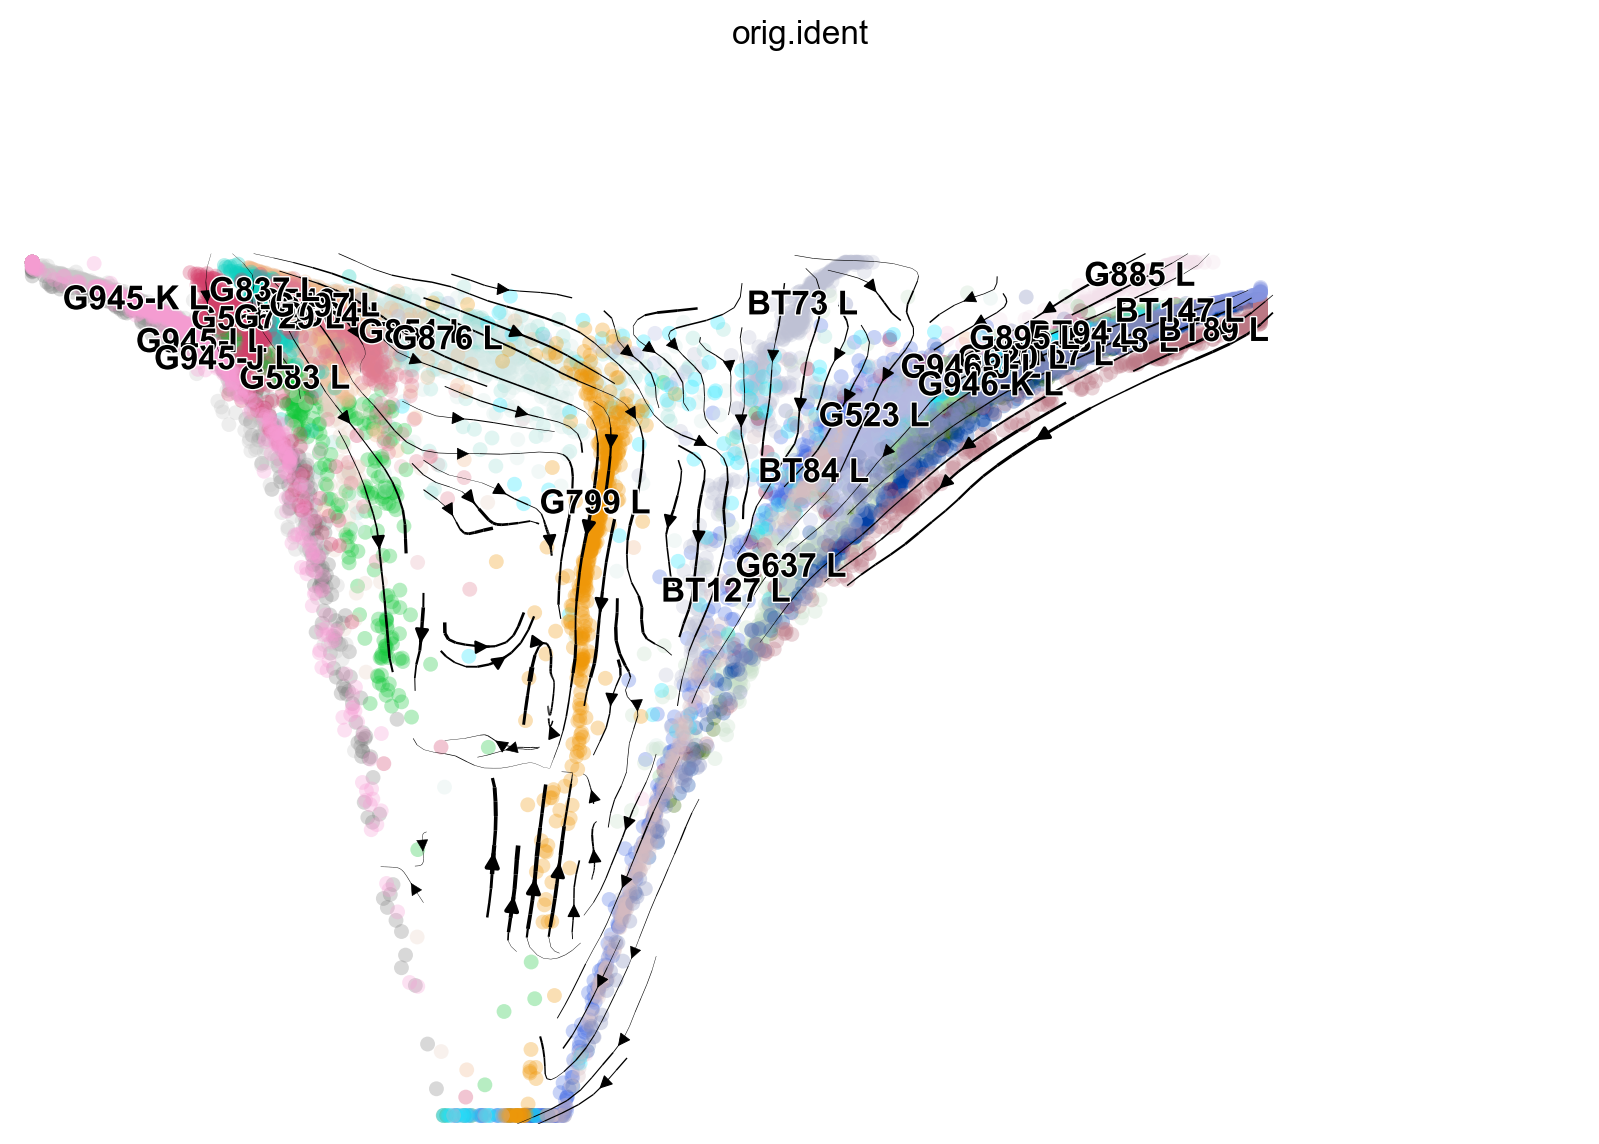

In [15]:
scv.pl.velocity_embedding_stream(adata, basis = 'dm', color = 'orig.ident', figsize = (10, 7))